<a href="https://colab.research.google.com/github/Sona30k/Sugarcane_Production/blob/main/SugarCaneProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [ ]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [ ]:
df.shape

(103, 7)

DATA CLEANING

In [ ]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",","")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",","")

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)

df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)

df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)

df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [ ]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [ ]:
df=df.dropna().reset_index()

In [ ]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,1,India,Asia,348448000,260721,4950000,703935
2,2,2,China,Asia,123059739,88287,1675215,734591
3,3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [ ]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)


df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)  # changing the data-type of "production per person" column to float


df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)  # changing the data-type of "Acreage" column to float


df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)  # changing the data-type of "Yi

In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [ ]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_person(Kg),101
Acreage(Hectare),101
Yield(Kg/Hectare),102


UNIVARIATE ANALYSIS

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


HOW MANY COUNTRIES PRODUCE SUGARCANE FROM EACH CONTINENT???

In [ ]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

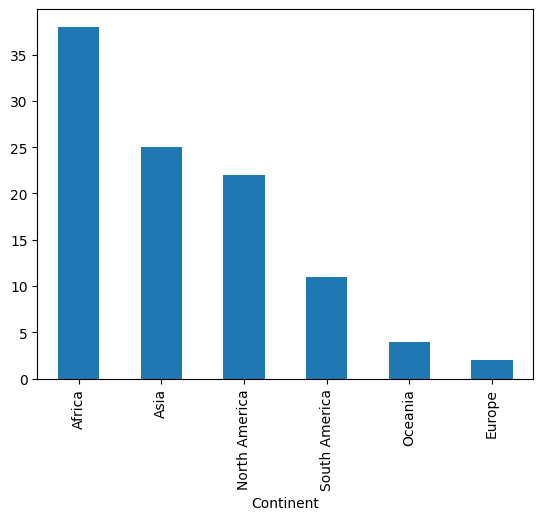

In [ ]:
df["Continent"].value_counts().plot(kind="bar")

<Axes: ylabel='Yield(Kg/Hectare)'>

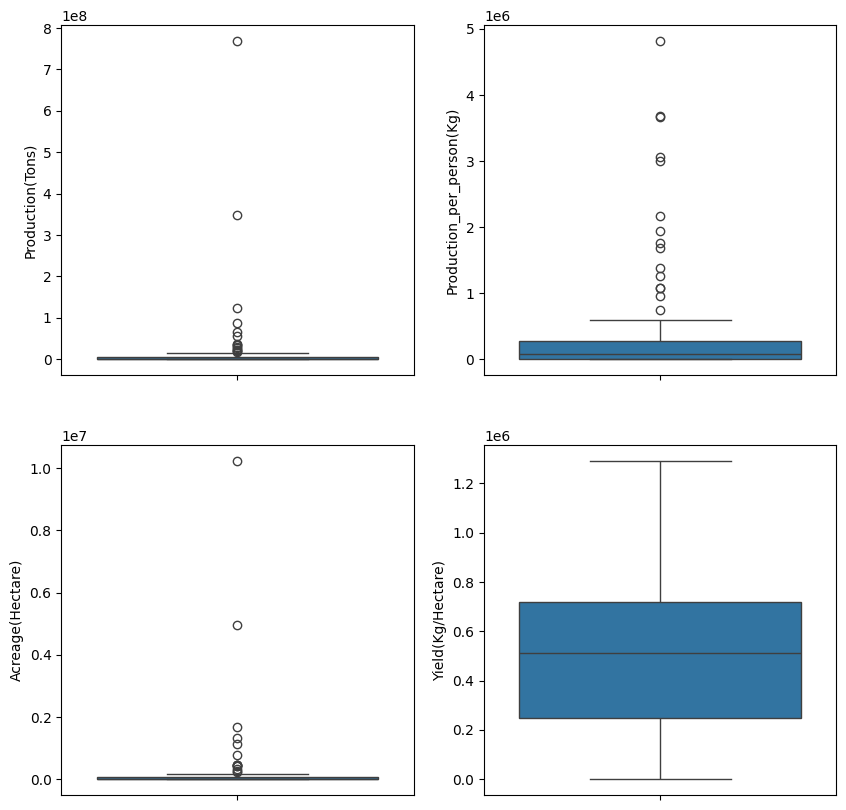

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [ ]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


BIVARIATE ANALYSIS

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


WHICH COUNTRY PRODUCES MAXIMUM SUGARCANE??

In [ ]:
df1= df[["Country","Production(Tons)"]].set_index("Country")

In [ ]:
df1

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [ ]:
df1['Production(Tons)_percent']=df1['Production(Tons)']*100/df1['Production(Tons)'].sum()

In [ ]:
df1

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

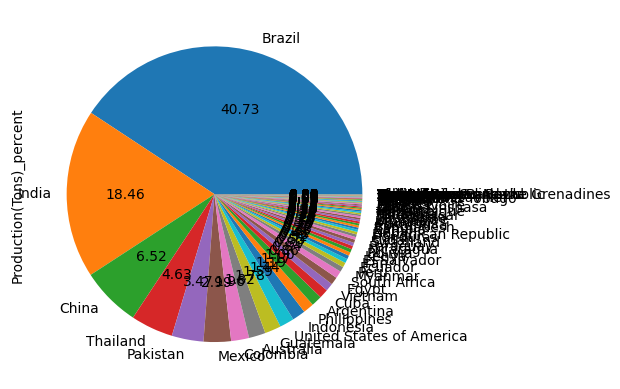

In [ ]:
df1['Production(Tons)_percent'].plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Country'>

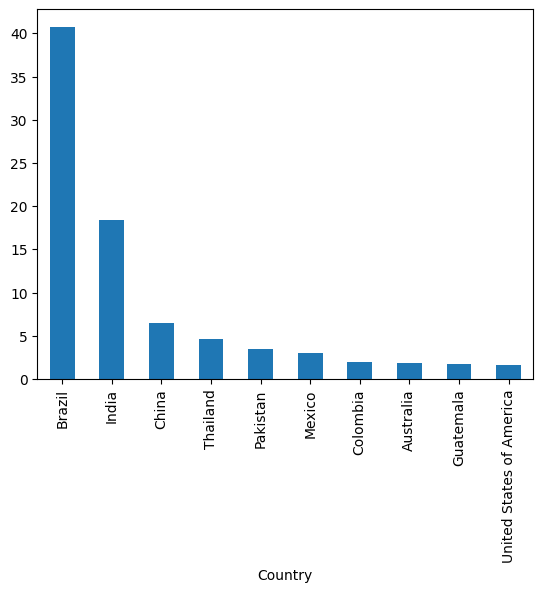

In [ ]:
df1['Production(Tons)_percent'].head(10).plot(kind='bar')

<ipython-input-40-fc5a61cd6bf5>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

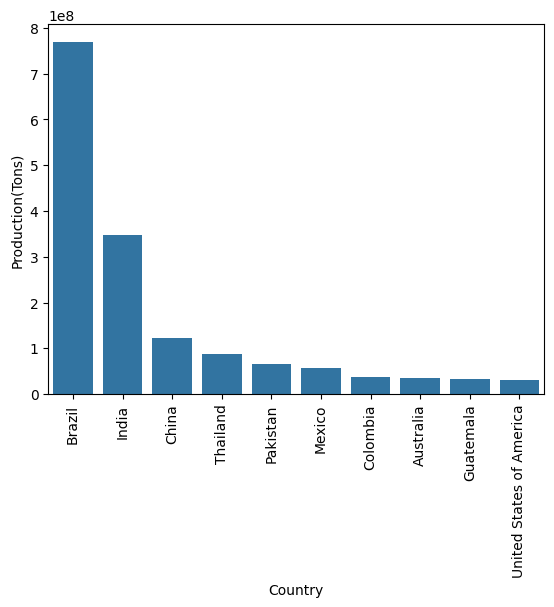

In [ ]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)

WHICH COUNTRYY HAS HIGHEST LAND???

<ipython-input-44-9b9a84eca29d>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


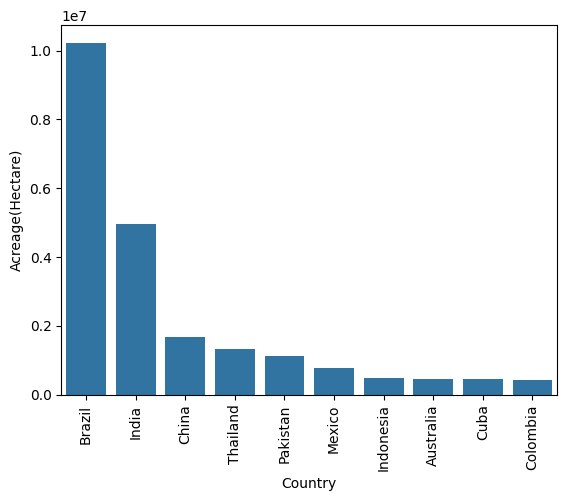

In [ ]:
df_acr=df.sort_values("Acreage(Hectare)", ascending= False)
ax=sns.barplot(data=df_acr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

WHICH COUNTRY HAS HIGHEST YEILD PER HECTARE??

<ipython-input-46-775b5a36bde0>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(ax.get_xticklabels(),rotation =90)


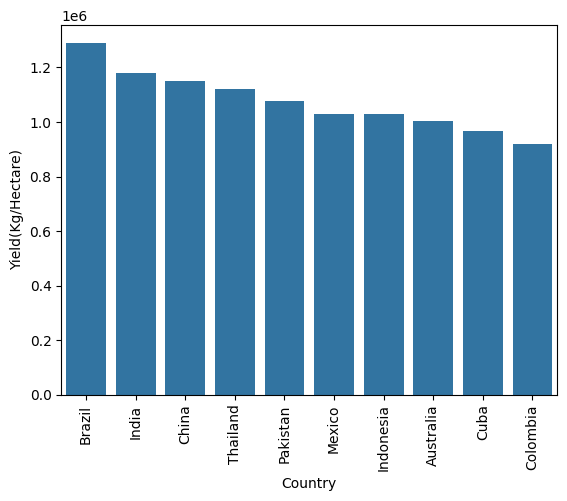

In [ ]:

df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(10)  # Taking the top 15 values of the original dataset

dx = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")

dx.set_xticklabels(ax.get_xticklabels(),rotation =90)

plt.show()

WHICH COUNTRY HAS HIGHEST PRODUCTION

<ipython-input-48-784c1ae0d04f>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hx.set_xticklabels(ax.get_xticklabels(),rotation =90)


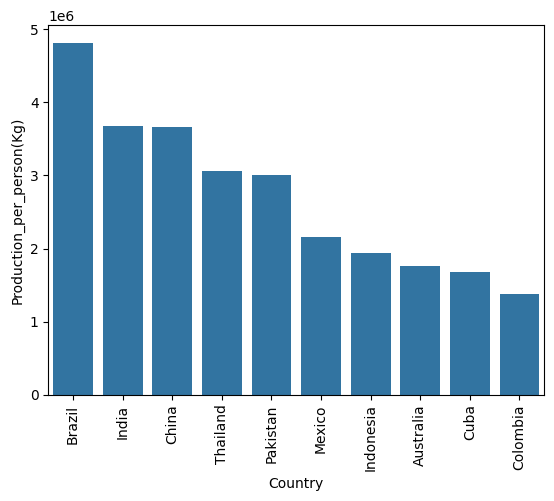

In [ ]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(10)  # Taking the top 15 values of the original dataset

hx = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")

hx.set_xticklabels(ax.get_xticklabels(),rotation =90)

plt.show()

CORRELATION

In [ ]:
#df.corr()
dt=df.select_dtypes(include='number').corr()
dt


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.352369,0.997550,0.121125
Production_per_person(Kg),0.352369,1.000000,0.341974,0.226719
Acreage(Hectare),0.997550,0.341974,1.000000,0.107826
Yield(Kg/Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

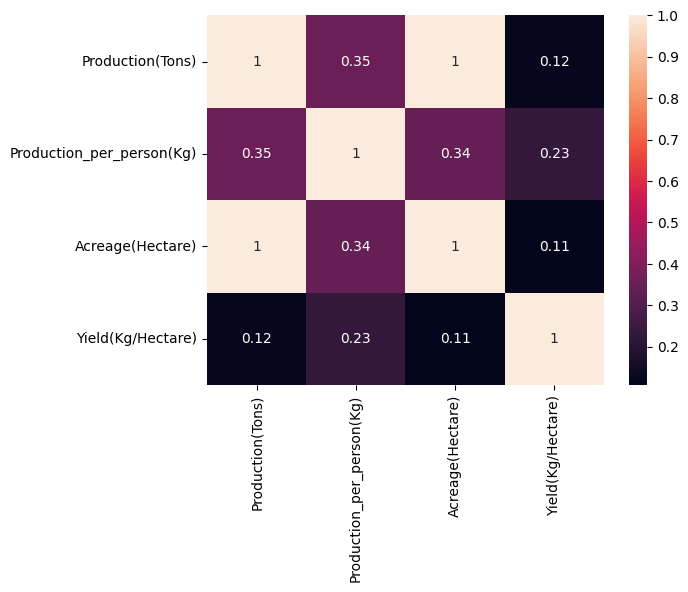

In [ ]:
sns.heatmap(dt,annot=True)

DO COUNTRIES WITH HIGHEST LAND PRODUCE MORE SUGARCANE??

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

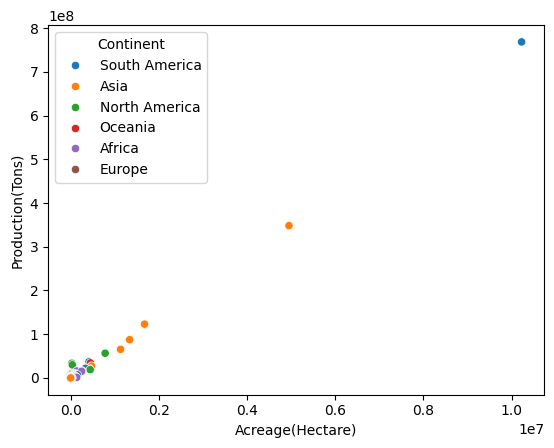

In [ ]:
sns.scatterplot(data=df, x="Acreage(Hectare)",y="Production(Tons)",hue="Continent")

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

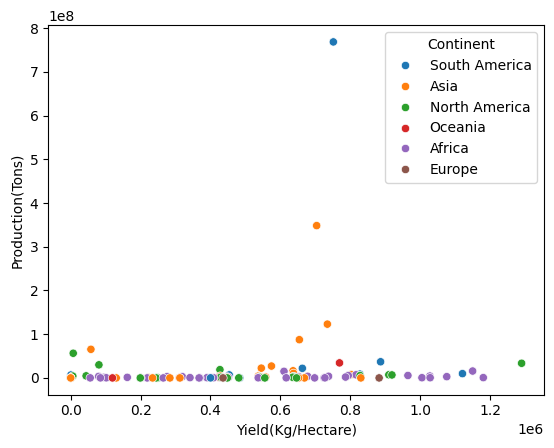

In [ ]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")


ANALYSIS FOR CONTINENT

In [ ]:
df_cnt =df.groupby("Continent").sum()

In [ ]:
df_cnt

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0


WHICH CONTINENT PRODUCES MAXIMUM SUGARCANE??

<Axes: xlabel='Continent'>

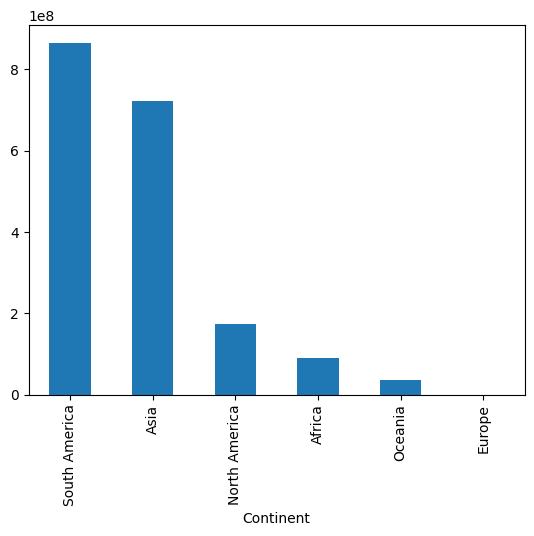

In [ ]:
df_cnt["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")  # Bar graph to describe max sugarcane production continent-wise


Do number of countries in a Continent effects production of sugarcane?


In [ ]:
df_cnt["number_of_countries"]=df.groupby("Continent").count()["Country"]


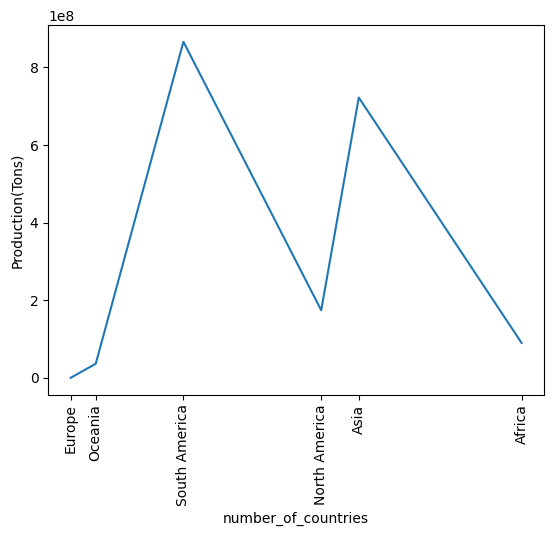

In [ ]:
continent_names = df_cnt.index.to_list()

sns.lineplot(data = df_cnt,x = "number_of_countries", y= "Production(Tons)" )  # Creating a Line Plot for the groupby'ed data


plt.xticks(df_cnt["number_of_countries"], continent_names, rotation =90)


plt.show()

Do the Continent with highest land produces more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

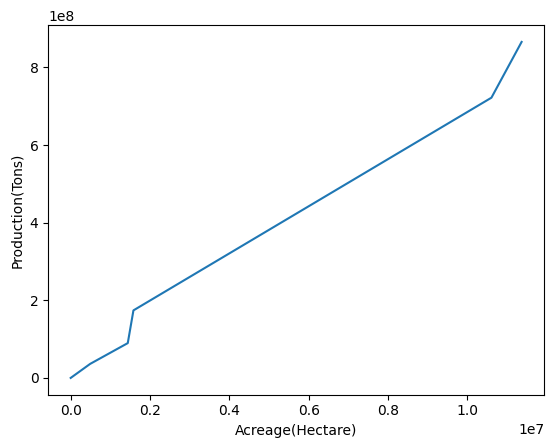

In [ ]:

sns.lineplot(data = df_cnt,x = "Acreage(Hectare)", y= "Production(Tons)" )  # Creating a Line Plot for the above analysis


PRODUCTION DISTRIBUTION BY CONTINENT

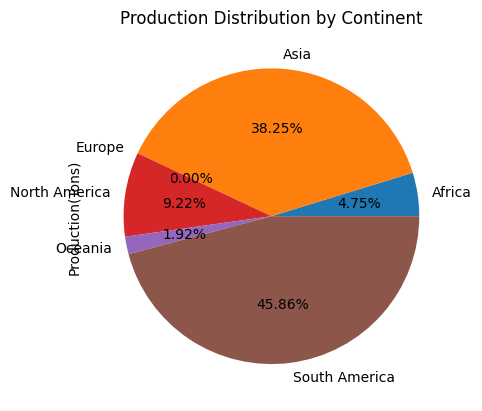

In [ ]:
df_cnt["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')


plt.show()


CORRELATION FOR THE CONTINENT

In [ ]:
df_cnt.corr(numeric_only=True)

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.143100,0.994897,0.104312,0.109244
Production_per_person(Kg),0.143100,1.000000,0.073059,0.514924,0.526387
Acreage(Hectare),0.994897,0.073059,1.000000,0.126764,0.132817
Yield(Kg/Hectare),0.104312,0.514924,0.126764,1.000000,0.983807
number_of_countries,0.109244,0.526387,0.132817,0.983807,1.000000
